In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import datasets

(x_train , y_train) , (x_test , y_test) = datasets.fashion_mnist.load_data()

In [3]:
x_train.shape , y_train.shape , x_train.dtype , y_train.dtype

((60000, 28, 28), (60000,), dtype('uint8'), dtype('uint8'))

In [4]:
def preprocess(data):
    data = data.astype("float32") / 255.0
    data = np.pad(data , ((0,0) , (2,2) , (2,2)) , constant_values = 0.0)
    data = np.expand_dims(data , -1)
    return data

In [5]:
x_train_1 = preprocess(x_train)
x_test_1 = preprocess(x_test)

In [6]:
x_train_1.shape 

(60000, 32, 32, 1)

In [7]:
# Encoder Architecture

encoder_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (32,32,1) , name = "encoder_input"),
    tf.keras.layers.Conv2D( 32 , (3,3) , strides = 2 , activation = "relu" , padding = "same"),
    tf.keras.layers.Conv2D(64 , (3,3) , strides = 2 ,  activation = "relu" , padding = "same"),
    tf.keras.layers.Conv2D(128 , (3,3) , strides = 2 , activation = "relu" , padding = "same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2 , name = "encoder_output") # Our 2-Dimentional latent space
])

In [8]:
encoder_model.summary()
# encoder_model.build()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras import backend as K
flatten_shape = K.int_shape(encoder_model.layers[-2].output)[1:]
flatten_shape

(2048,)

In [10]:
# Decoder Architecture

decoder_model = tf.keras.Sequential([
    tf.keras.Input(shape = (2,) , name = "decoder_input"),
    tf.keras.layers.Dense(np.prod(flatten_shape)),
    tf.keras.layers.Reshape((4, 4, 128)),
    tf.keras.layers.Conv2DTranspose(128 , (3,3) , strides = 2 , activation = "relu" , padding = "same"),
    tf.keras.layers.Conv2DTranspose(64 , (3,3) , strides = 2 , activation = "relu" , padding = "same"),
    tf.keras.layers.Conv2DTranspose(32 , (3,3) , strides = 2 , activation = "relu" , padding = "same"),
    tf.keras.layers.Conv2D(1 , (3,3) , strides = 1 , activation = "sigmoid" , padding = "same" , name = "decoder_output")
])

In [11]:
decoder_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Conv2D)              │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
encoder_input = tf.keras.layers.Input(shape=(32, 32, 1), name="encoder_input")
encoded = encoder_model(encoder_input)
decoded = decoder_model(encoded)

In [13]:
# The full autoencoder - A model that takes an image and passes it through the encoder and back out through the decoder to 
# generate a reconstruction of the original image.
autoencoder = tf.keras.Model(inputs=encoder_input, outputs=decoded)

In [14]:
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 2)                   │          96,770 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 32, 32, 1)           │         246,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343,043 (1.31 MB)

 Trainable params: 343,043 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the autoencoder
autoencoder.compile(optimizer = "adam" , loss = "binary_crossentropy")

In [17]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = "./checkpoint/checkpoint.keras",
    save_weights_only = False,
    save_freq = "epoch",
    monitor = "loss",
    mode="min",
    save_best_only=True,
)

In [18]:
autoencoder.fit(
    x_train_1,
    x_train_1,
    epochs = 5,
    batch_size = 100 ,
    shuffle = True , 
    validation_data = (x_test_1 , x_test_1),
    callbacks = [model_checkpoint]
)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - loss: 0.3602 - val_loss: 0.2600
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - loss: 0.2571 - val_loss: 0.2561
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 52s 87ms/step - loss: 0.2545 - val_loss: 0.2537
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 53s 88ms/step - loss: 0.2517 - val_loss: 0.2524
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 53s 88ms/step - loss: 0.2505 - val_loss: 0.2510


In [19]:
# autoencoder.save("autoencoder.keras")
# encoder_model.save("encoder.keras")
# decoder_model.save("decoder.keras")

In [20]:
# Reconstruction of the images

x_test_1.shape

(10000, 32, 32, 1)

In [21]:
example_images = x_test_1[ : 5000]
predictions = autoencoder.predict(example_images)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [22]:
predictions.shape

(5000, 32, 32, 1)

In [23]:
# Function to plot gray-scale images
def plot_images(images, num_images):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i, :, :, 0], cmap='gray')  
        ax.axis('off')
        ax.set_title(f"Image {i+1}")  

    plt.show()

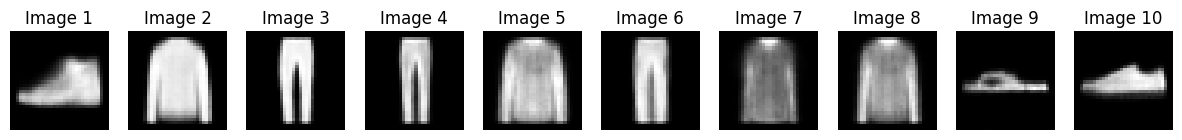

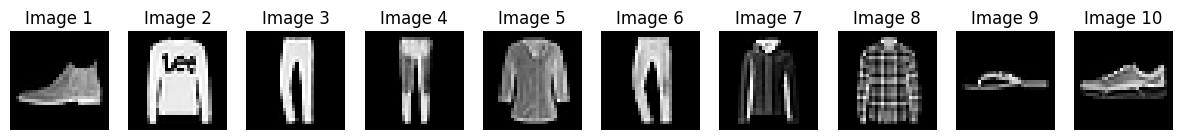

In [24]:
plot_images(predictions, 10)
plot_images(x_test_1, 10)

In [67]:
# 😂 the "Lee" logo is ignored like its nothing 

In [26]:
# Visualizing the latent space

embeddings = encoder_model.predict(example_images)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [28]:
embeddings[ : 5]

array([[ 3.3838882e+00, -6.7686357e-02],
       [-8.7343913e-01,  8.5573759e+00],
       [-9.3188848e+00,  1.5394531e+00],
       [-5.7934980e+00,  3.3103532e-01],
       [-5.4611601e-03,  4.3785138e+00]], dtype=float32)

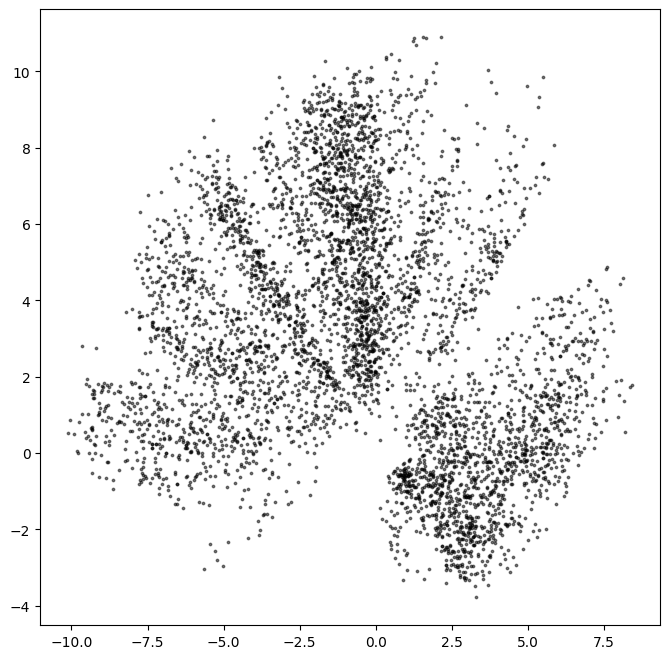

In [29]:
plt.figure(figsize = (8 , 8))
plt.scatter(embeddings[ : , 0] , embeddings[ : ,1] , c = "black" , alpha = 0.5 , s = 3)
plt.show()

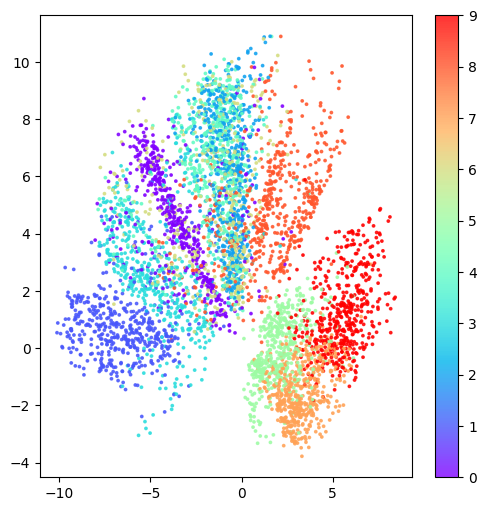

In [31]:
# Colour the embeddings by their label (clothing type - see table)
example_labels = y_test[:5000]

figsize = 6
plt.figure(figsize=(figsize, figsize))
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    cmap="rainbow",
    c=example_labels,
    alpha=0.8,
    s=3,
)
plt.colorbar()
plt.show()

In [44]:
# Generating new images
min , max = np.min(embeddings , axis=0) , np.max(embeddings , axis=0)
sample = np.random.uniform(min , max , size = (8 , 2))
generation_new = decoder_model.predict(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


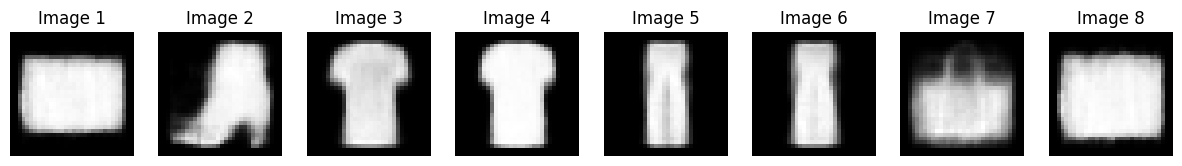

In [45]:
plot_images(generation_new , 8)

In [46]:
sample

array([[ 5.54237701,  9.18093568],
       [ 7.99780422,  6.11629735],
       [-4.7198201 ,  5.91293978],
       [-8.55988697,  9.76482814],
       [-7.29915741,  2.77487687],
       [-6.38666024,  3.02744639],
       [ 1.71448378,  4.21645435],
       [ 4.87921951, 10.70110797]])

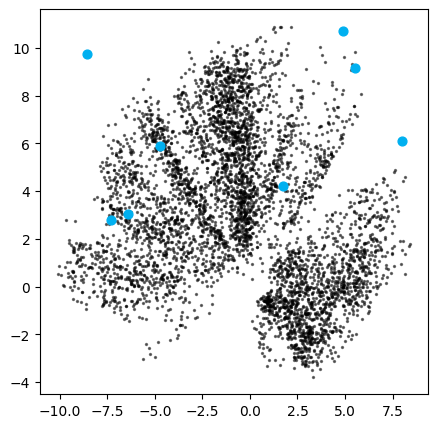

In [47]:

figsize = 5
plt.figure(figsize=(figsize, figsize))

plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=2)

plt.scatter(sample[:, 0], sample[:, 1], c="#00B0F0", alpha=1, s=40)
plt.show()



# Limitaions of Autoencoders and why we need Variational Autoencoders

* Some generated items are more realistic than others.
* Distribution is not symmetric about point (0,0).
* There are large gaps . The latent space is not continuous.
* Some part of the latent space carved out for a certain class is more than as compared to other class .
* Distribution of the latent space is not defined.
* Lots of white space . The autoencoder has no reason to ensure that points here are decoded to recognizable clothing items as vary few images in the training set are encoded here .
* Latent Space is not continuous . (-1 , -1) --> Sandal (sure) but (-1.1 , -1.1) --> Sandal (not sure) .

In 2D these reasons are stuble . The gaps between similar items are small but as we go to higher dimension the gaps between similar points increase as sampling from the higher dimension latent space becomes hard . **WRONG GENERATION** .

# Variational Autoencoders
1. In an autoencoder each images is mapped directly to one point in the latent space . In Variational Autoencoders , each images is instead mepped to a     multivariate normal distribution around a point in the latent space .
2. We can sample a point z from a normal distribution with mean μ and standard deviation σ using the following equation:  z = μ + σε
3. The encoder will map each input to a mean vector and a variance vector and does not need to worry about covariance between dimensions . Variational autoencoders assums that there is no correlation between dimensions in the latent space.
4. *z_mean* --> The mean point of the distibution
   *z_log_var* --> The logarithm of the variance of each dimension
5. z = z_mean + z_sigma * epsilon  --> sample a point z from the distribution 

Why does this small change to the encoder help ?

Previously, we saw that there was no requirement for the latent space to be continu‐
ous—even if the point (–2, 2) decodes to a well-formed image of a sandal, there’s no
requirement for (–2.1, 2.1) to look similar. Now, since we are sampling a random
point from an area around z_mean, the decoder must ensure that all points in the
same neighborhood produce very similar images when decoded, so that the recon‐
struction loss remains small. This is a very nice property that ensures that even when
we choose a point in the latent space that has never been seen by the decoder, it is
likely to decode to an image that is well formed.

In [50]:
x_train_1.shape , x_test_1.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

In [48]:
#The Sampling class is a custom layer in a neural network that implements the reparameterization trick used in Variational Autoencoders (VAEs). 
# This trick allows you to sample a point from a distribution defined by a mean (z_mean) and a variance (z_log_var), but in a way that allows
# gradients to pass through the sampling process.

class Sampling(tf.keras.layers.Layer):
    def call(self , inputs):
        z_mean , z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape = (batch , dim)) # This adds randomness to the sampling process.
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon # Reparameterization Trick

In [ ]:
vae_encoder_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (32,32,1) , name = "encoder_input"),
    tf.keras.layers.Conv2D( 32 , (3,3) , strides = 2 , activation = "relu" , padding = "same"),
    tf.keras.layers.Conv2D(64 , (3,3) , strides = 2 ,  activation = "relu" , padding = "same"),
    tf.keras.layers.Conv2D(128 , (3,3) , strides = 2 , activation = "relu" , padding = "same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2 , name = "z_mean") ,
    tf.keras.layers.Dense(2 , name = "z_log_var"),
    Sampling([z_mean , z_log_var])
])